In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [5]:
df = pd.read_csv("./data/boston.csv")

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Attribute Information:

* **CRIM**: per capita crime rate by town
* **ZN**: proportion of residential land zoned for lots over 25,000 sq.ft.
* **INDUS**: proportion of non-retail business acres per town
* **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* **NOX**: nitric oxides concentration (parts per 10 million)
* **RM**: average number of rooms per dwelling
* **AGE**: proportion of owner-occupied units built prior to 1940
* **DIS**: weighted distances to five Boston employment centres
* **RAD**: index of accessibility to radial highways
* **TAX**: full-value property-tax rate per 10,000 
* **PTRATIO**: pupil-teacher ratio by town
* **B**: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* **LSTAT**: % lower status of the population
* **MEDV**: Median value of owner-occupied homes in $1000's

In [10]:
df.shape

(506, 14)

In [12]:
df['MEDV']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [14]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [16]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [17]:
df.duplicated().sum()

0

### Exploratory Data Analysis

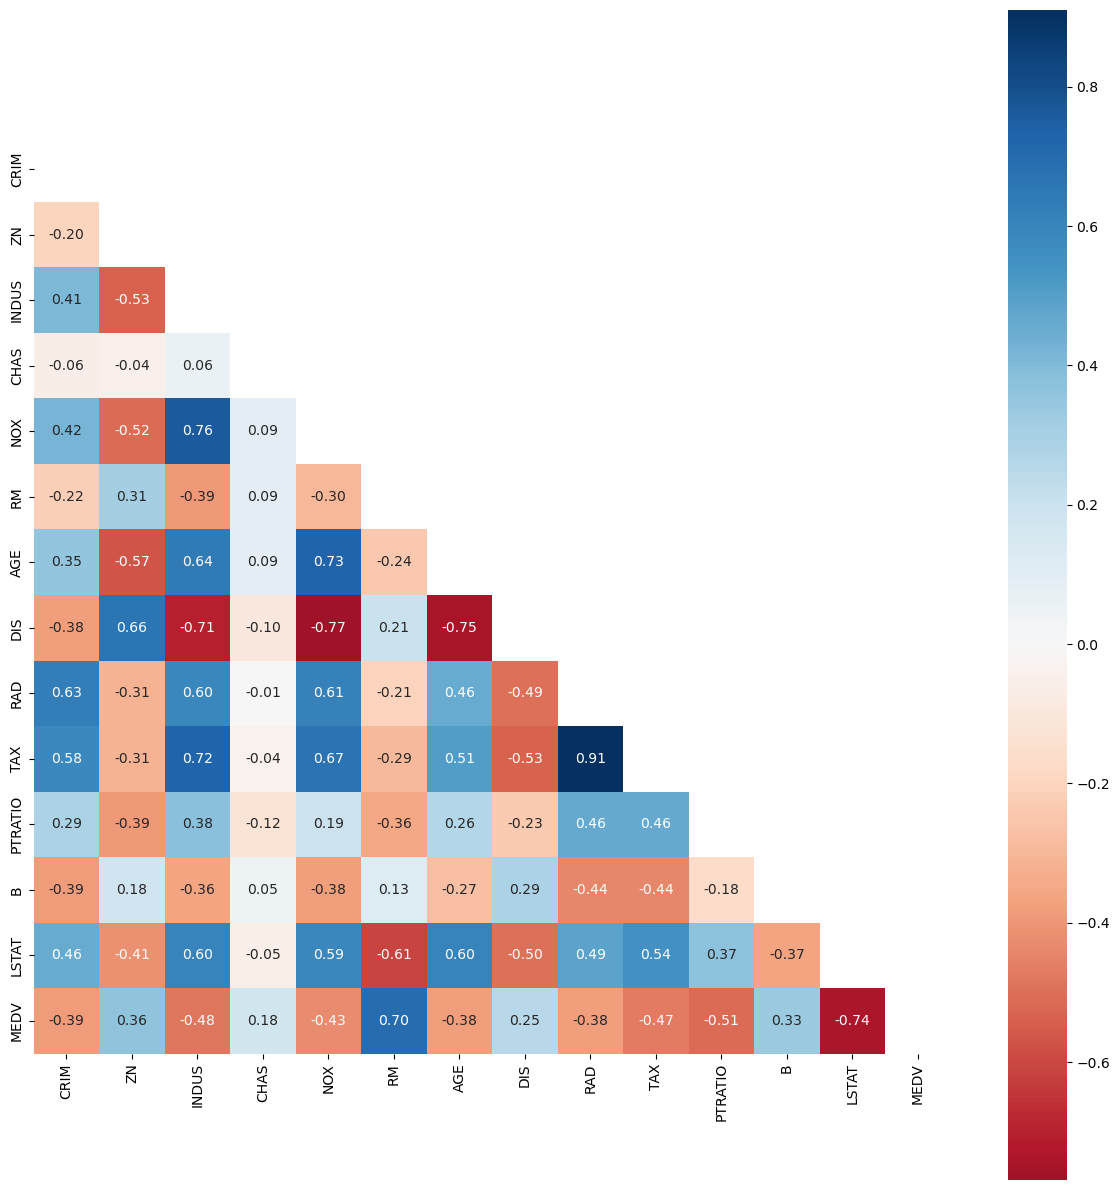

In [38]:
import seaborn as sns
# Compute the correlation matrix
corr = df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the figure
plt.figure(figsize=(12, 12))

# Plot the heatmap with the mask
sns.heatmap(corr, mask=mask, annot=True, cmap='RdBu', center=0, square=True, fmt=".2f")

# Customize the layout
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

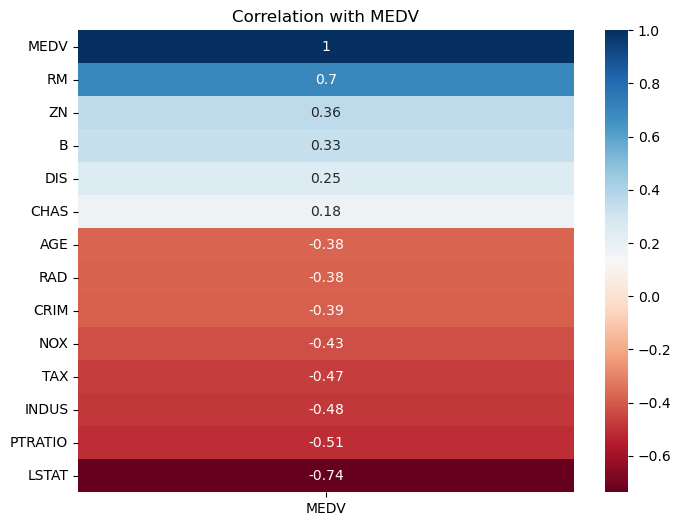

In [39]:
# correlation b/w independent and dependent feature
# Compute the correlation matrix
corr = df.corr()

# Select correlations with the target column (e.g., 'MEDV') and convert to DataFrame
target_corr = corr[['MEDV']].sort_values(by = 'MEDV', ascending=False)

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(target_corr, annot=True, cmap='RdBu', cbar=True)

# Show the plot
plt.title('Correlation with MEDV')
plt.show()


<Axes: title={'center': 'RM vs MEDV'}, xlabel='RM', ylabel='MEDV'>

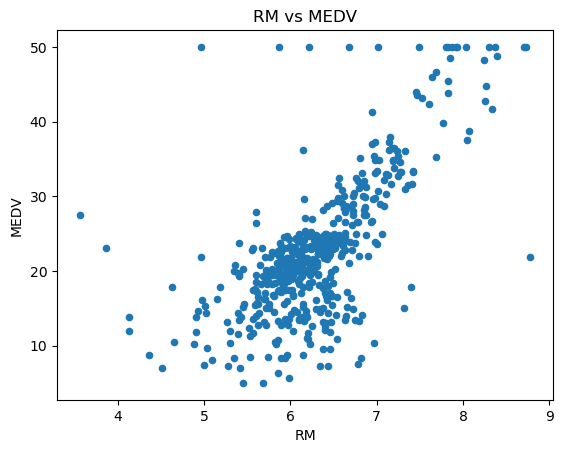

In [46]:
df.plot(x = 'RM', y='MEDV', kind='scatter', xlabel='RM', ylabel='MEDV', title='RM vs MEDV')

<Axes: title={'center': 'LSTAT vs MEDV'}, xlabel='LSTAT', ylabel='MEDV'>

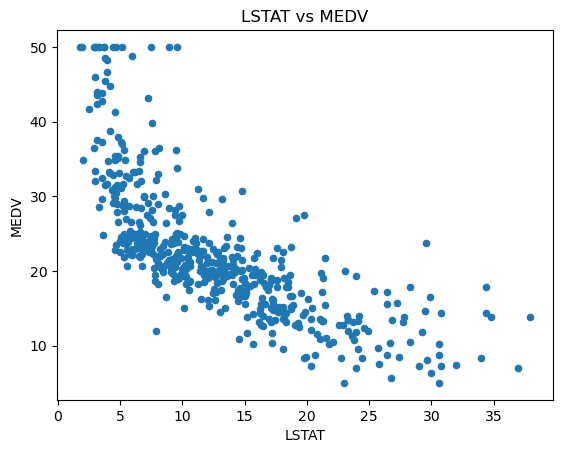

In [47]:
df.plot(x = 'LSTAT', y='MEDV', kind='scatter', xlabel='LSTAT', ylabel='MEDV', title='LSTAT vs MEDV')

<Axes: title={'center': 'PTRATIO vs MEDV'}, xlabel='PTRATIO', ylabel='MEDV'>

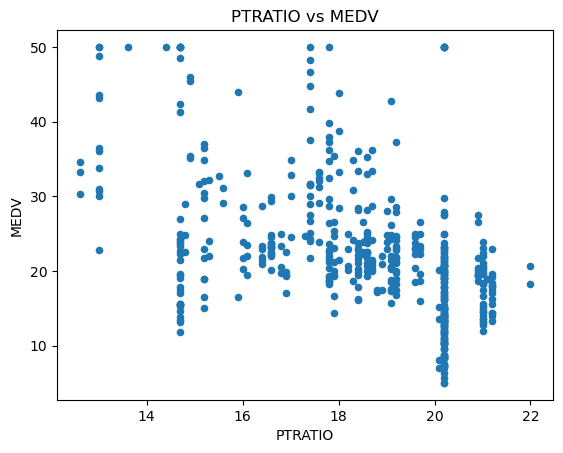

In [48]:
df.plot(x = 'PTRATIO', y='MEDV', kind='scatter', xlabel='PTRATIO', ylabel='MEDV', title='PTRATIO vs MEDV')

<Axes: title={'center': 'INDUS vs MEDV'}, xlabel='INDUS', ylabel='MEDV'>

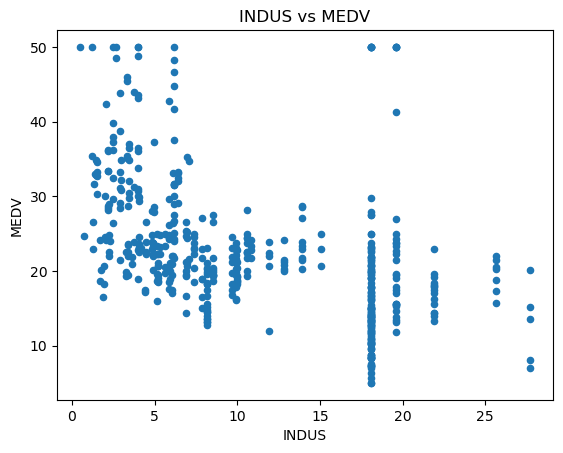

In [49]:
df.plot(x = 'INDUS', y='MEDV', kind='scatter', xlabel='INDUS', ylabel='MEDV', title='INDUS vs MEDV')

<Axes: xlabel='RM', ylabel='MEDV'>

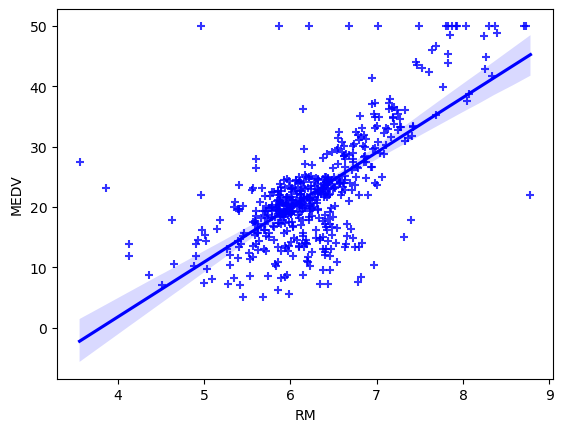

In [68]:
import seaborn as sns
sns.regplot(data=df, x='RM', y='MEDV', color='blue', marker='+' )

<Axes: xlabel='CHAS', ylabel='MEDV'>

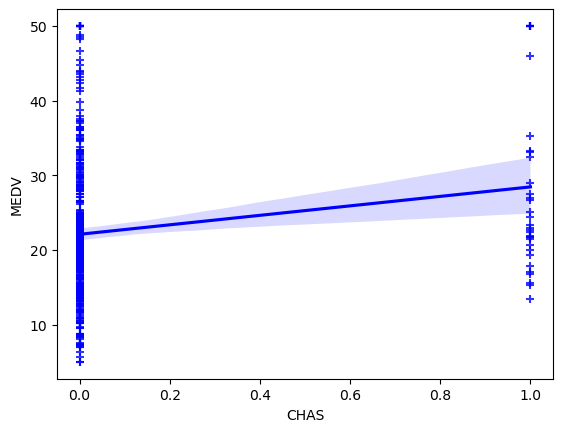

In [66]:
import seaborn as sns
sns.regplot(data=df, x='CHAS', y='MEDV', color='blue', marker='+' )

<Axes: xlabel='ZN', ylabel='MEDV'>

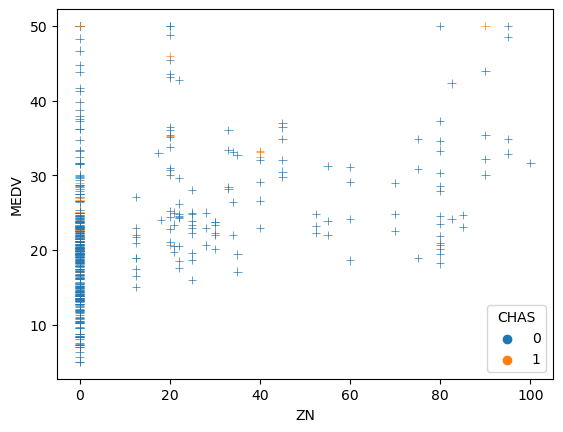

In [73]:
sns.scatterplot(data=df, x='ZN', y='MEDV', color='blue', marker='+', hue='CHAS' )

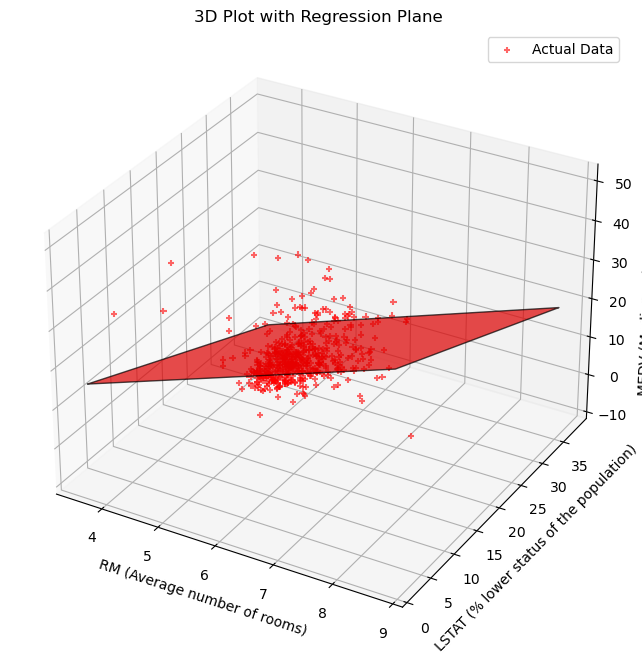

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

X = df[['RM', 'LSTAT']]  
y = df['MEDV']          

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Create a mesh grid for RM and LSTAT
rm_range = np.linspace(X['RM'].min(), X['RM'].max(), 50)
lstat_range = np.linspace(X['LSTAT'].min(), X['LSTAT'].max(), 50)
rm_grid, lstat_grid = np.meshgrid(rm_range, lstat_range)

# Predict MEDV values for the grid
z = model.predict(np.c_[rm_grid.ravel(), lstat_grid.ravel()])
z = z.reshape(rm_grid.shape)

# Create the 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of actual data points
ax.scatter(X['RM'], X['LSTAT'], y, color='red', label='Actual Data', alpha=0.6, marker='+')

# Plot the regression plane
ax.plot_surface(rm_grid, lstat_grid, z, color='red', alpha=0.7, rstride=100, cstride=100, edgecolor='k')

# Add labels
ax.set_xlabel('RM (Average number of rooms)')
ax.set_ylabel('LSTAT (% lower status of the population)')
ax.set_zlabel('MEDV (Median value of homes)')
ax.set_title('3D Plot with Regression Plane')

# Add legend
ax.legend()

# Show the plot
plt.show()


In [74]:
# Independent and Dependent features 
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [77]:
# train test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [78]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666.0,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.520,5.836,91.9,2.2110,5,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.464,5.856,42.1,4.4290,3,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666.0,20.2,109.85,23.27


In [80]:
from sklearn.preprocessing import StandardScaler

In [132]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[-0.41425879, -0.50512499, -1.29214218, ...,  0.18727079,
         0.39651419, -1.01531611],
       [-0.40200818, -0.50512499, -0.16208345, ..., -0.21208981,
         0.3870674 , -0.05366252],
       [-0.39721053, -0.50512499, -0.60948856, ..., -0.16771641,
         0.42854113, -0.31132373],
       ...,
       [-0.41604586,  3.03838247, -1.3166773 , ..., -0.56707702,
         0.35987906, -0.90549329],
       [ 0.92611293, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.87841346,  1.52750437],
       [-0.39030549, -0.50512499, -0.37135358, ...,  1.16348561,
        -3.32828832, -0.25218837]])

In [133]:
X_test_scaled = scaler.transform(X_test)

In [134]:
X_test_scaled

array([[-0.406801  , -0.50512499, -1.02225586, ..., -0.74457062,
         0.41241246, -0.47605794],
       [-0.41105674,  1.26662874, -0.68165068, ..., -0.30083661,
         0.42854113, -1.25185755],
       [-0.4051199 , -0.50512499,  2.39678516, ...,  0.8084984 ,
         0.35031705,  0.79535229],
       ...,
       [-0.35439903, -0.50512499, -0.71195877, ..., -0.38958342,
         0.25688594, -1.09697922],
       [ 0.25423453, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.98970133,  0.53487511],
       [ 0.77732457, -0.50512499,  1.00549958, ...,  0.8528718 ,
         0.33199949,  0.56585078]])

## Model Training

In [135]:
from sklearn.linear_model import LinearRegression

In [136]:
lr = LinearRegression()

In [137]:
lr.fit(X_train, y_train)

LinearRegression()

In [138]:
lr.coef_

array([-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,  3.11983512e+00,
       -1.54170609e+01,  4.05719923e+00, -1.08208352e-02, -1.38599824e+00,
        2.42727340e-01, -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
       -5.47113313e-01])

In [139]:
lr.intercept_

31.63108403569186

In [140]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [141]:
y_pred = lr.predict(X_test)
y_pred

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

In [142]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.7434997532004697
0.7112260057484903


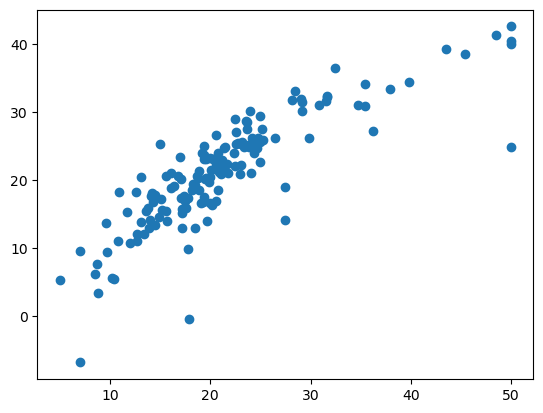

In [143]:
# plot scatter plot for the prediction
plt.scatter(y_test, y_pred)


In [144]:
residuals = y_test - y_pred


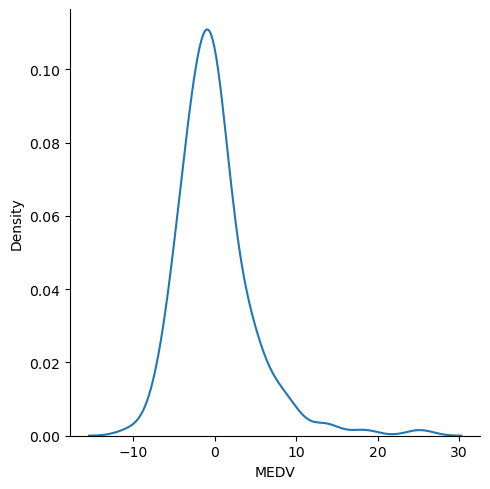

In [145]:
## plot this residuals

sns.displot(residuals, kind='kde')

In [146]:
# this should be normal to become a good model

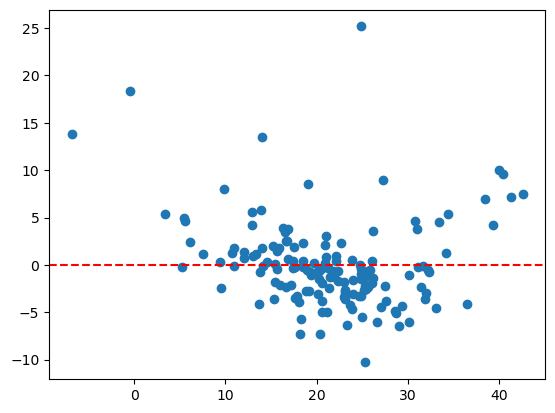

In [147]:
# scatter plot with respect to prediction and residuals
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--', label='y = 0')

In [148]:
from sklearn.metrics import mean_squared_error

In [149]:
mean_squared_error(y_test, y_pred)

21.517444231177432

In [150]:
np.sqrt(mean_squared_error(y_test, y_pred))

4.6386899261728445

In [151]:
from sklearn.metrics import r2_score

In [152]:
r2_score(y_test, y_pred)

0.7112260057484903

In [153]:
sum(residuals**2)

3270.6515231389685

In [154]:
sum((y_test - np.mean(y_test))**2)

11325.990526315787

In [155]:
3270.6515231389685 / 11325.990526315787

0.28877399425150974

In [156]:
1 - 0.28877399425150974

0.7112260057484903

## New Data Prediction

In [157]:
df.iloc[0].shape

(14,)

In [158]:
df.iloc[0].values.reshape(1, -1)
scaler.transform(df.iloc[0].values.reshape(1, -1)[:, :-1])

array([[-0.41709233,  0.29216419, -1.27338003, -0.28154625, -0.16513629,
         0.34715902, -0.13030059,  0.15267164, -0.97798895, -0.66777595,
        -1.32142483,  0.42854113, -1.04769976]])

In [160]:
lr.predict(scaler.transform(df.iloc[0].values.reshape(1, -1)[:, :-1]))

array([36.0500866])

## Pickling The Model file For Deployment

In [161]:
import pickle

In [169]:
pickle.dump(lr, open('model.pkl', 'wb'))